# Data Exploratory Analysis

Purpose of this notebook is a transformation of csv to SQL.

---
# Setup

In [1]:
# dependencies - data analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

import missingno as msno
import csv

In [2]:
# dependencies - sqlalchemy
from sqlalchemy import (create_engine, MetaData, Table, 
    Column, String, Integer, insert, select, func, desc)

---
# Get data

In [3]:
header_names = ['activity_name', 'category_name', 
                'start_date_ms', 'start_date', 
                'end_date_ms', 'end_date',
                'duration_ms', 'duration'
               ]

In [4]:
csv_path = '../data/activities.csv'

In [5]:
df = pd.read_csv(csv_path,names=header_names, skiprows=1)

In [6]:
df.keys()

Index(['activity_name', 'category_name', 'start_date_ms', 'start_date',
       'end_date_ms', 'end_date', 'duration_ms', 'duration'],
      dtype='object')

# Create Database - SQL Alchemy

In [7]:
connection_string = 'sqlite:///../data/activity.sqlite'
engine = create_engine(connection_string)
engine

Engine(sqlite:///../data/activity.sqlite)

In [8]:
metadata = MetaData()
metadata

MetaData(bind=None)

In [9]:
connection = engine.connect()

# Database reflection - SQL Alchemy



In [10]:
df.to_sql('activity', con=engine, index=True, 
          index_label='id', if_exists='replace')

In [11]:
df = pd.read_sql('SELECT * FROM activity', con=connection)
df

,id,activity_name,category_name,start_date_ms,start_date,end_date_ms,end_date,duration_ms,duration
0,0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,596554,9 min
1,1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,2950509,49 min
2,2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,26637950,7 h 23 min
3,3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,491019,8 min
4,4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,495128,8 min
5,5,Moving - youtube,Transport,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,87980,1 min
6,6,Clean,Personal Hygiene,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1371581,22 min
7,7,Food,Feeding,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1649400,27 min
8,8,Moving - youtube,Transport,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1267657,21 min
9,9,Moving - youtube,Transport,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1540195000783,Mon Oct 22 09:56:40 GMT+02:00 2018,180000,3 min


In [12]:
pd.DataFrame(engine.execute('SELECT * FROM activity').fetchall())

,0,1,2,3,4,5,6,7,8
0,0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,596554,9 min
1,1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,2950509,49 min
2,2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,26637950,7 h 23 min
3,3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,491019,8 min
4,4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,495128,8 min
5,5,Moving - youtube,Transport,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,87980,1 min
6,6,Clean,Personal Hygiene,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1371581,22 min
7,7,Food,Feeding,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1649400,27 min
8,8,Moving - youtube,Transport,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1267657,21 min
9,9,Moving - youtube,Transport,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1540195000783,Mon Oct 22 09:56:40 GMT+02:00 2018,180000,3 min


In [13]:
activity_table = Table('activity', metadata,
                Column('id', Integer(), primary_key=True),
                Column('activity_name', String(100)),
                Column('category_name', String(100)),
                Column('start_date_ms', Integer()),
                Column('start_date', String(100)),
                Column('end_date_ms', Integer()),
                Column('end_date', String(100)),
                Column('duration_ms', Integer()),
                Column('duration', String(100)),
                extend_existing=True)

In [14]:
activity_table

Table('activity', MetaData(bind=None), Column('id', Integer(), table=<activity>, primary_key=True, nullable=False), Column('activity_name', String(length=100), table=<activity>), Column('category_name', String(length=100), table=<activity>), Column('start_date_ms', Integer(), table=<activity>), Column('start_date', String(length=100), table=<activity>), Column('end_date_ms', Integer(), table=<activity>), Column('end_date', String(length=100), table=<activity>), Column('duration_ms', Integer(), table=<activity>), Column('duration', String(length=100), table=<activity>), schema=None)

In [15]:
metadata.create_all(engine)

### Alternativ - From a list into the table
Table created fresh. We will use pandas CSV to SQL method.

```python
activity_list = []

with open(csv_path, newline='') as f:
    first_line = True
    activity_reader = csv.reader(f, delimiter=',')
    for row in activity_reader:
        if first_line:
            first_line = False
            continue
        data = {
            'activityName' : row[0],
            'activityCategoryName' : row[1],
            'activityStartDate [ms]' : row[2],
            'activityStartDate' : row[3],
            'activityEndDate [ms]' : row[4],
            'activityEndDate' : row[5],
            'activityDuration [ms]' : row[6],
            'activityDuration' : row[7]
        }
        activity_list.append(data)
    
len(activity_list)
```

```python
statement = insert(activity)
results = connection.execute(statement, activity_list)
print(results.rowcount)
```


## Get data - Standard analysis

![info](data/info.png)

In [16]:
activity_cols = activity_table.columns

In [17]:
# column names
activity_cols.keys()

['id',
 'activity_name',
 'category_name',
 'start_date_ms',
 'start_date',
 'end_date_ms',
 'end_date',
 'duration_ms',
 'duration']

In [18]:
# shape of table
statement = select([func.count(activity_table)])
results = connection.execute(statement).first()
(results[0], len(activity_cols.keys()))

(3386, 9)

In [19]:
# head
statement = select([activity_table])
# statement = statement.limit(5)
results = connection.execute(statement).fetchall()
results

[(0, 'Trello', 'Personal Adjusting', 1540159273005, 'Mon Oct 22 00:01:13 GMT+02:00 2018', 1540159869559, 'Mon Oct 22 00:11:09 GMT+02:00 2018', 596554, '9 min'),
 (1, 'Series / Docu', 'Entertainment', 1540159869559, 'Mon Oct 22 00:11:09 GMT+02:00 2018', 1540162820068, 'Mon Oct 22 01:00:20 GMT+02:00 2018', 2950509, '49 min'),
 (2, 'Sleep', 'Refresh', 1540162820068, 'Mon Oct 22 01:00:20 GMT+02:00 2018', 1540189458018, 'Mon Oct 22 08:24:18 GMT+02:00 2018', 26637950, '7 h 23 min'),
 (3, 'Moving - youtube', 'Transport', 1540189458018, 'Mon Oct 22 08:24:18 GMT+02:00 2018', 1540189949037, 'Mon Oct 22 08:32:29 GMT+02:00 2018', 491019, '8 min'),
 (4, 'Trello', 'Personal Adjusting', 1540189949037, 'Mon Oct 22 08:32:29 GMT+02:00 2018', 1540190444165, 'Mon Oct 22 08:40:44 GMT+02:00 2018', 495128, '8 min'),
 (5, 'Moving - youtube', 'Transport', 1540190444165, 'Mon Oct 22 08:40:44 GMT+02:00 2018', 1540190532145, 'Mon Oct 22 08:42:12 GMT+02:00 2018', 87980, '1 min'),
 (6, 'Clean', 'Personal Hygiene', 

In [20]:
# tail
statement = select([activity_table])
statement = statement.order_by(desc(activity_cols.id))
statement = statement.limit(5)
results = connection.execute(statement).fetchall()
results

[(3385, 'Clean', 'Personal Hygiene', 1551256313154, 'Wed Feb 27 09:31:53 GMT+01:00 2019', 1551257046239, 'Wed Feb 27 09:44:06 GMT+01:00 2019', 733085, '12 min'),
 (3384, 'Sport', 'Sport', 1551255533154, 'Wed Feb 27 09:18:53 GMT+01:00 2019', 1551256313154, 'Wed Feb 27 09:31:53 GMT+01:00 2019', 780000, '13 min'),
 (3383, 'Learning - Language', 'Learning', 1551254587367, 'Wed Feb 27 09:03:07 GMT+01:00 2019', 1551255533154, 'Wed Feb 27 09:18:53 GMT+01:00 2019', 945787, '15 min'),
 (3382, 'Social - girl', 'Social - Persist', 1551252667367, 'Wed Feb 27 08:31:07 GMT+01:00 2019', 1551254587367, 'Wed Feb 27 09:03:07 GMT+01:00 2019', 1920000, '32 min'),
 (3381, 'Learning - Language', 'Learning', 1551251227367, 'Wed Feb 27 08:07:07 GMT+01:00 2019', 1551252667367, 'Wed Feb 27 08:31:07 GMT+01:00 2019', 1440000, '24 min')]

# Pure SQL 

In [21]:
df = pd.read_sql('SELECT * FROM activity', con=connection)
df

,id,activity_name,category_name,start_date_ms,start_date,end_date_ms,end_date,duration_ms,duration
0,0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,596554,9 min
1,1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,2950509,49 min
2,2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,26637950,7 h 23 min
3,3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,491019,8 min
4,4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,495128,8 min
5,5,Moving - youtube,Transport,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,87980,1 min
6,6,Clean,Personal Hygiene,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1371581,22 min
7,7,Food,Feeding,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1649400,27 min
8,8,Moving - youtube,Transport,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1267657,21 min
9,9,Moving - youtube,Transport,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1540195000783,Mon Oct 22 09:56:40 GMT+02:00 2018,180000,3 min


# Conclusion
We tried out pandas, SQL Alchemy and pure SQL with pandas.
The closest to the real world will be pure SQL so we use this option to process further. 

### Get data - Standard analysis - Missing data

In [22]:
query = """
SELECT 
    COUNT(id) AS id,
    COUNT(activity_name) AS activity_name,
    COUNT(category_name) AS category_name,
    COUNT(start_date_ms) AS start_date_ms,
    COUNT(start_date) AS start_date,
    COUNT(end_date_ms) AS end_date_ms,
    COUNT(end_date) AS end_date,
    COUNT(duration_ms) AS duration_m,
    COUNT(duration) AS duration
FROM activity
WHERE 
    id IS NULL OR
    activity_name IS NULL OR 
    category_name IS NULL OR 
    start_date_ms IS NULL OR 
    start_date IS NULL OR 
    end_date_ms IS NULL OR 
    end_date IS NULL OR 
    duration_ms IS NULL OR 
    duration IS NULL
"""
df_missing = pd.read_sql(query, con=connection)
df_missing

,id,activity_name,category_name,start_date_ms,start_date,end_date_ms,end_date,duration_m,duration
0,0,0,0,0,0,0,0,0,0


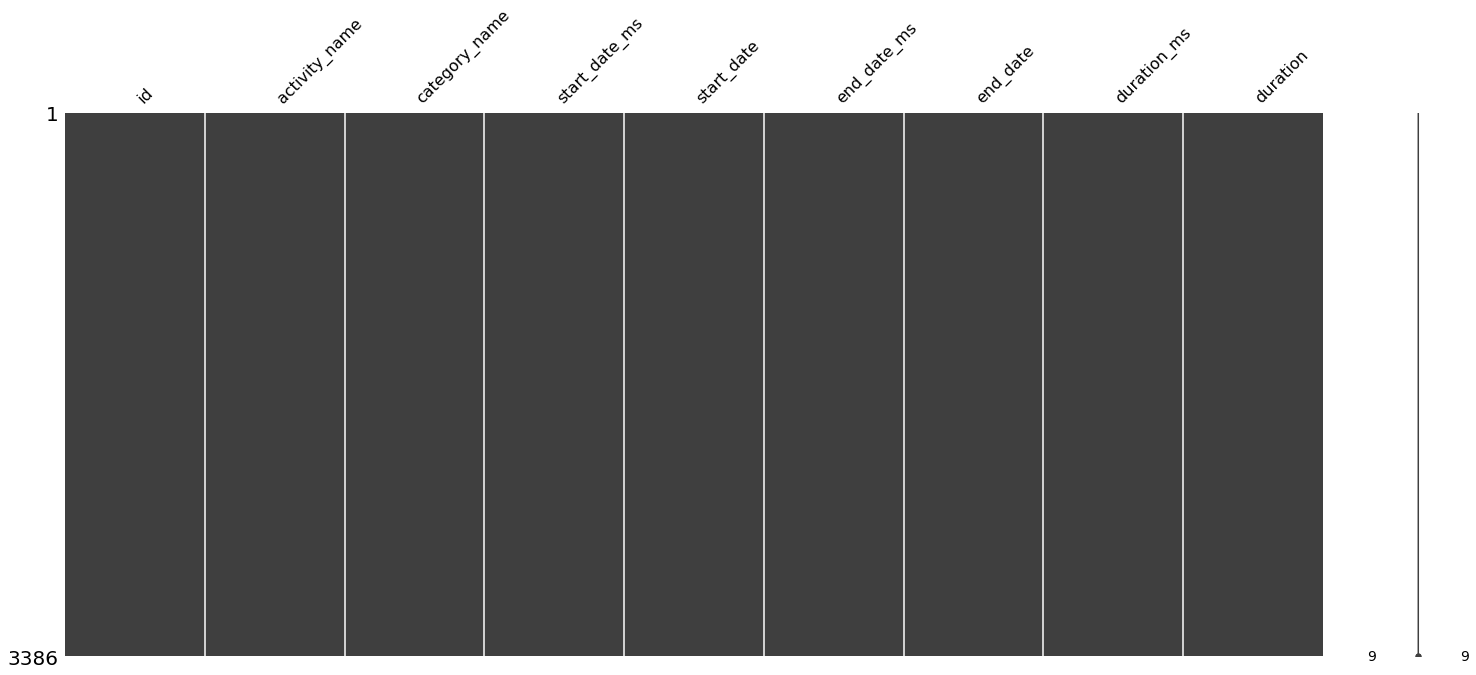

In [23]:
# Nice visualization
msno.matrix(df) 

# Conclusion: Clean Data
No missing values are found in the data. No filling of missing values is necessary. 

---
# Clean table creation
Goal is to create a cleaned data, selected features and augmented table.

## Clean table creation - Feature selection 

Let's take only relevant features into our clean table:
- activity, 
- category, 
- start_date_timestamp, 
- start_date,
- end_date_timestamp,
- end_date,
- activity_duration[ms]
- activity_duration

---
## Clean table creation - Generating Insights

###  Clean table creation - Generating Insights - Displaying unique activities

In [24]:
query = """
SELECT 
    DISTINCT activity_name
FROM activity
"""
df_activities = pd.read_sql(query, con=connection)
df_activities

,activity_name
0,Trello
1,Series / Docu
2,Sleep
3,Moving - youtube
4,Clean
5,Food
6,Work - Purpose
7,Social - Real Life
8,WC
9,Work - Learning


## Category values

###  Clean table creation - Generating Insights - Displaying unique categories

In [25]:
query = """
SELECT DISTINCT category_name
FROM activity
"""
df_categories = pd.read_sql(query, con = connection)
df_categories

,category_name
0,Personal Adjusting
1,Entertainment
2,Refresh
3,Transport
4,Personal Hygiene
5,Feeding
6,Purpose
7,Social - Persist
8,Value Contribution
9,Org & Duty


###  Clean table creation - Generating Insights -  top / least activities

In [26]:
query = """
SELECT activity_name, COUNT(activity_name) AS activity_count
FROM activity
GROUP BY activity_name
ORDER BY activity_count DESC
"""
df_activity_count = pd.read_sql(query, connection)
df_activity_count

,activity_name,activity_count
0,Food,270
1,Clean,172
2,Sleep,151
3,Social - girl,132
4,Moving - social,129
5,Food - Prepare,116
6,WC,100
7,Series / Docu,98
8,Social - Real Life,97
9,Trello,89


In [27]:
n_limit = 40

In [28]:
plots = []

titel = 'Most frequent activities (TOP {})'.format(n_limit)
xname = 'activity_name'
yname = 'activity_count'
xlabel = 'activity'
ylabel = 'n activity'
query = '''
SELECT {0}, COUNT(activity_name) AS {1}
FROM activity
GROUP BY {0}
ORDER BY {1} DESC
LIMIT({2})
'''.format(xname, yname, n_limit)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
plots.append(plot)

titel = 'Least frequent activities (TOP {})'.format(n_limit)
xname = 'activity_name'
yname = 'activity_count'
xlabel = 'activity'
ylabel = 'n activity'
query = '''
SELECT {0}, COUNT(activity_name) AS {1}
FROM activity
GROUP BY {0}
ORDER BY {1}
LIMIT({2})
'''.format(xname, yname, n_limit)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
plots.append(plot)

titel = 'Average activities (TOP {})'.format(n_limit)
xname = 'activity_name'
yname = 'avg_activity_duration'
xlabel = 'activity'
ylabel = 'n activity'
query = '''
SELECT {0}, AVG(duration) AS {1}
FROM activity
GROUP BY {0}
ORDER BY {1} DESC
LIMIT {2}
'''.format(xname,yname, n_limit)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
plots.append(plot)

titel = 'Shortest average activity duration (TOP {})'.format(n_limit)
xname = 'activity_name'
yname = 'avg_activity_duration'
xlabel = 'activity'
ylabel = 'n activity'
query = '''
SELECT {0}, AVG(duration) AS {1}
FROM activity
GROUP BY {0}
ORDER BY {1}
LIMIT {2}
'''.format(xname,yname, n_limit)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
plots.append(plot)

In [29]:
def bar_plot(df, titel, xname, yname, xlabel, ylabel):
    plt.figure(figsize=(8,8))
    plt.title(titel)
    plt.bar(df[xname], df[yname])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


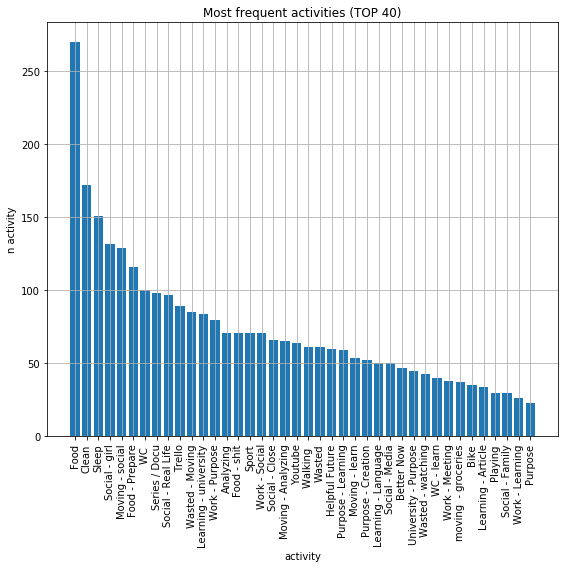

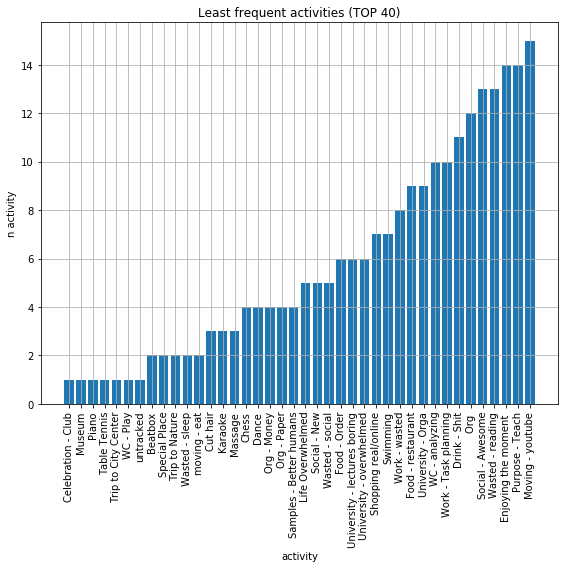

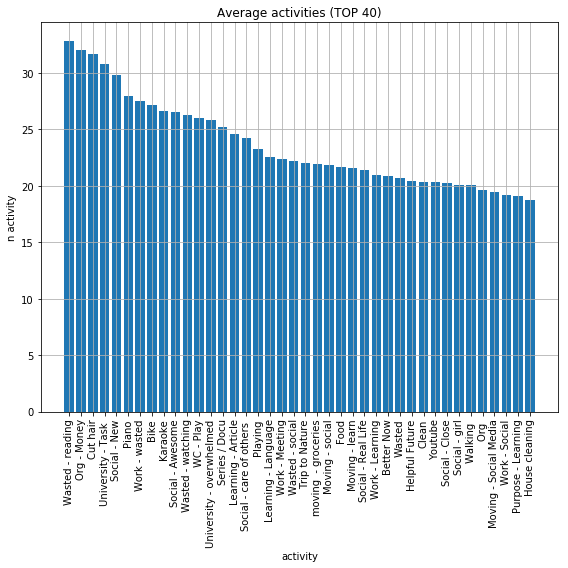

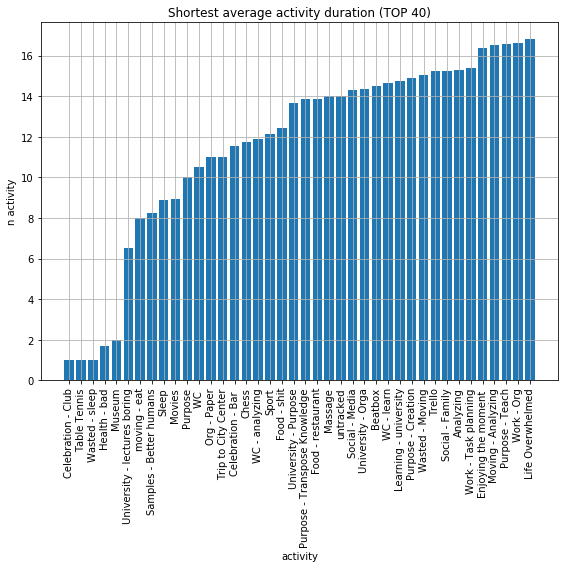

In [30]:
for plot in plots:
    # execute queries 
    df_temp = pd.read_sql(plot['query'], connection)
    # bar plot
    bar_plot(df_temp, plot['titel'], plot['xname'], plot['yname'], plot['xlabel'], plot['ylabel'])

### Conclusion
The occurrence of activities is for basic needs like food, clean, sleep very high. 
Interesting is the amount of time and frequency spend with my girl friend. Also the amount of movement occure a lot of time

In [31]:
special_plots = []

titel = 'Most frequent time wastes (TOP {})'.format(n_limit)
xname = 'activity_name'
yname = 'avg_activity_duration'
xlabel = 'activity'
ylabel = 'n activity'
query = '''
SELECT {0}, AVG(duration) AS {1}
FROM activity
WHERE category_name = "Wasted Time"
GROUP BY {0}
ORDER BY {1} DESC
'''.format(xname,yname)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
special_plots.append(plot)

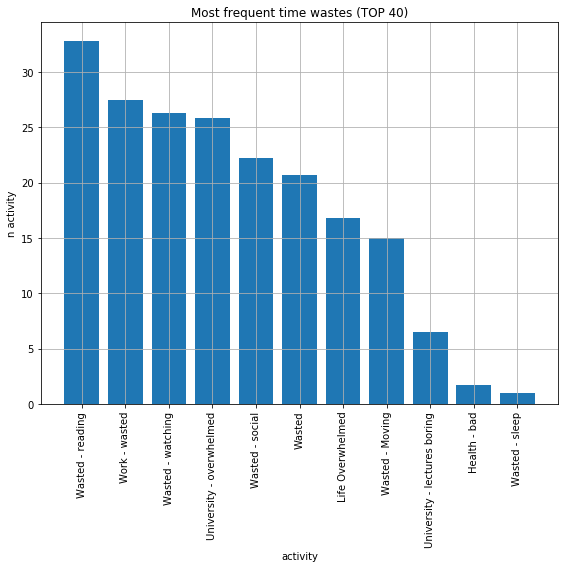

In [32]:
for plot in special_plots:
    # execute queries 
    df_temp = pd.read_sql(plot['query'], connection)
    # bar plot
    bar_plot(df_temp, plot['titel'], plot['xname'], plot['yname'], plot['xlabel'], plot['ylabel'])

### Conclusion
My biggest waste is:
  
|Rank|Activity|Counter_activity|
|---|:-----:|---:|
|1|reading|Wonderful approach to tackle this would be site blocker|
|2|working with no passion|Already tackled - changed job|
|3|watching (series, movies, image boards)|site blocker|
|4|university overwhelmed|change courses |
|5|social|expand social circle|

### Total percentage of time spend on category/activity

In [33]:
# here we calculate the percentage directly
pie_plots = []

# SUM of total duration of category / SUM of total duration 
titel = 'Total percentage on category'
xname = 'category_name'
yname = 'category_duration'
xlabel = 'category_name'
ylabel = 'total time in [%]'
query = '''
SELECT {0} AS {0}, 
(SUM(duration_ms) * 100 / (SELECT SUM(duration_ms) FROM activity)) AS {1}
FROM activity
GROUP BY {0}
ORDER BY {1} DESC
'''.format(xname,yname)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
pie_plots.append(plot)


# SUM of total duration of activy / SUM of total duration 
titel = 'Total percentage on activity'
xname = 'activity_name'
yname = 'activity_duration'
xlabel = 'activity_name'
ylabel = 'total time in [%]'
query = '''
SELECT {0} AS {0}, 
(SUM(duration_ms) * 100 / (SELECT SUM(duration_ms) FROM activity)) AS {1}
FROM activity
GROUP BY {0}
ORDER BY {1} DESC
'''.format(xname,yname)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
pie_plots.append(plot)

In [34]:
# here we let piechart calculate the percentage 
pie_plots = []

# SUM of total duration of category / SUM of total duration 
titel = 'Total percentage on category'
xname = 'category_name'
yname = 'category_duration'
xlabel = 'category_name'
ylabel = 'total time in [%]'
query = '''
SELECT {0} AS {0}, SUM(duration_ms) AS {1}
FROM activity
WHERE {0} <> "Refresh"
GROUP BY {0}
ORDER BY {1} DESC
'''.format(xname,yname)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
pie_plots.append(plot)


# SUM of total duration of activy / SUM of total duration 
titel = 'Total percentage on activity'
xname = 'activity_name'
yname = 'activity_duration'
xlabel = 'activity_name'
ylabel = 'total time in [%]'
query = '''
SELECT {0} AS {0}, SUM(duration_ms) AS {1}
FROM activity
WHERE {0} <> "Sleep"
GROUP BY {0}
ORDER BY {1} DESC
'''.format(xname,yname)
plot = {'titel': titel, 'query': query, 'xname': xname, 
        'yname': yname,'xlabel': xlabel, 'ylabel':ylabel}
pie_plots.append(plot)

In [35]:
def pie_plot(df, titel, xname, yname, xlabel, ylabel):
    plt.figure(figsize=(8,8))
    plt.title(titel)
    patches = plt.pie(df[yname], labels = df[xname], autopct='%1.1f%%')
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal') 
    plt.show()


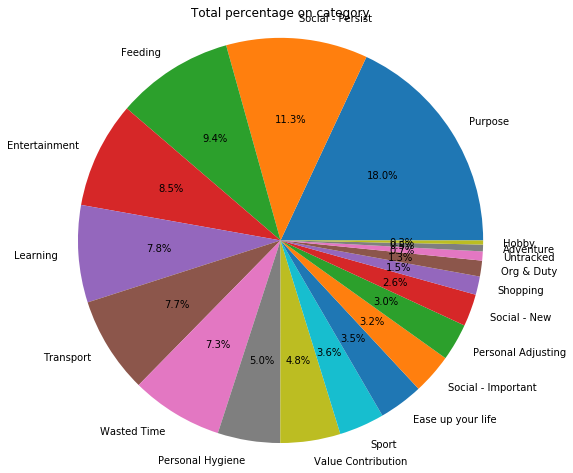

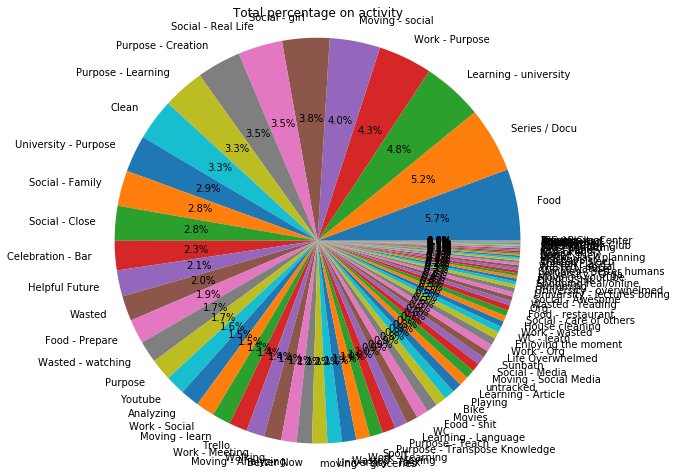

In [36]:
for plot in pie_plots:
    # execute queries 
    df_temp = pd.read_sql(plot['query'], connection)
    # bar plot
    pie_plot(df_temp, plot['titel'], plot['xname'], plot['yname'], plot['xlabel'], plot['ylabel'])

# Conclusion:
Here the pie chart of activities shows us that our top 5 activities take more than 50 % of our time (excluded sleep).   

Top categories are:
- Purpose
- Social - persist
- Feeding
- Entertainment
- Learning

With 14 % Transport and Wasted time take a signigicant time. 
We should define counter activities towards these 2 categories.


The pie chart for activities does not give us a brief overview about the percentage of each activity. For further insides filtering has to be done. 

### Clean table creation - Generating Insights - Questions

# Conclusion: Data exploration
The data consists of a few columns for activity and category and timestamps. Data is available for the past 4 months of a single user. No values are missing in the data.

